# Análise de Qualidade dos Dados – FIFA 21 Raw

Este notebook realiza uma análise de qualidade dos dados brutos da tabela `fifa21_raw_data.csv`, considerando a camada **Raw** da pipeline.

## 1. Objetivos da Análise
- Avaliar completude dos dados
- Identificar campos inconsistentes ou problemáticos
- Entender distribuições básicas antes da camada Silver
- Detectar possíveis necessidades de tratamento futuro

## Imports e configurações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_theme(context="notebook", style="whitegrid")

## Carregamento dos Dados

In [3]:
df_raw = pd.read_csv("fifa21_raw_data.csv")

df_raw_temp = df_raw.copy()

/tmp/ipykernel_259024/2987745768.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("fifa21_raw_data.csv")


In [4]:
df_raw.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


## Visão Geral do Dataset

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [6]:
df_raw.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
photoUrl,18979,18978,https://cdn.sofifa.com/players/251/698/21_60.png,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LongName,18979,18851,Danny Rose,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
playerUrl,18979,18978,http://sofifa.com/player/251698/kevin-berlaso/...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nationality,18979,164,England,1704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Positions,18979,640,CB,2441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
PAS,18979.0,NaN,NaN,NaN,57.681069,10.081914,25.0,51.0,58.0,64.0,93.0
DRI,18979.0,NaN,NaN,NaN,62.875494,9.927875,25.0,57.0,64.0,69.0,95.0
DEF,18979.0,NaN,NaN,NaN,49.865904,16.44273,12.0,35.0,53.0,63.0,91.0
PHY,18979.0,NaN,NaN,NaN,64.368618,9.601665,28.0,58.0,65.0,71.0,91.0


#### Análise da Estatística Descritiva Geral

A análise estatística evidencia que o dataset apresenta **alta completude**, com a maioria das colunas possuindo valores preenchidos em praticamente todos os registros. Apesar disso, a presença de dados preenchidos não garante qualidade, já que diversos campos exibem problemas de padronização e formatação típicos da camada Raw.

O campo `LongName` apresenta duplicidades, indicando que nomes de jogadores não são únicos e não devem ser utilizados como chave primária.

Alta variabilidade em `Positions`, que contém múltiplas posições codificadas em um único campo indicando a necessidade de normalização para análises mais precisas.


## Dados Faltantes por Coluna

### Tabela de Nulos + Vazios

In [7]:
missing_data = pd.DataFrame({
    "Coluna": df_raw.columns,
    "Nulos": df_raw.isnull().sum().values,
    "Vazios": (df_raw == "").sum().values,
})

missing_data["Total"] = missing_data["Nulos"] + missing_data["Vazios"]
missing_data["%"] = (missing_data["Total"] / len(df_raw) * 100).round(2)

missing_data = missing_data[missing_data["Total"] > 0] \
    .sort_values("Total", ascending=False)

missing_data

,Coluna,Nulos,Vazios,Total,%
18,Loan Date End,17966,0,17966,94.66


#### Análise de Valores Nulos e Vazios

A análise de valores nulos e vazios revela que apenas a coluna `Loan Date End` apresenta ausência significativa de dados, com aproximadamente **94,66% dos registros nulos**. Esse comportamento indica que a maioria dos jogadores não se encontra em regime de empréstimo no momento do registro, tornando o preenchimento desse campo **condicional ao contexto do jogador**.

A inexistência de outras colunas com valores nulos ou vazios relevantes sugere que o dataset possui **alta completude estrutural**, característica positiva mesmo em uma camada Raw.

### Completude das Colunas

In [8]:
completeness = (df_raw.notna().sum() / len(df_raw) * 100).sort_values()

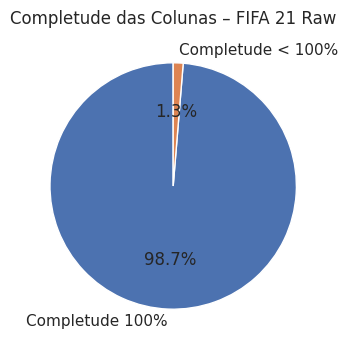

In [9]:
labels = ["Completude 100%", "Completude < 100%"]
values = [
    (completeness == 100).sum(),
    (completeness < 100).sum()
]

fig, ax = plt.subplots(figsize=(4, 4))

ax.pie(
    values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)

ax.set_title("Completude das Colunas – FIFA 21 Raw")

plt.show()

#### Análise de completude

Com valor de 98.7% nota-se que quase todas as colunas possuem todas as instâncias preenchidas, o que é um ótimo sinal para a parte de análise de dados.

### Análise do Campo Hits (Problema com uso de 'K' para milhares)

In [10]:

df_raw_temp["hits_format"] = np.where(
    df_raw_temp["Hits"].astype(str).str.contains("K", na=False),
    "Com 'K'",
    np.where(
        df_raw_temp["Hits"].astype(str).str.match(r"^\d+$", na=False),
        "Inteiro",
        "Outros / Nulos"
    )
)

hits_count = df_raw_temp["hits_format"].value_counts().reset_index()
hits_count.columns = ["Formato", "Quantidade"]

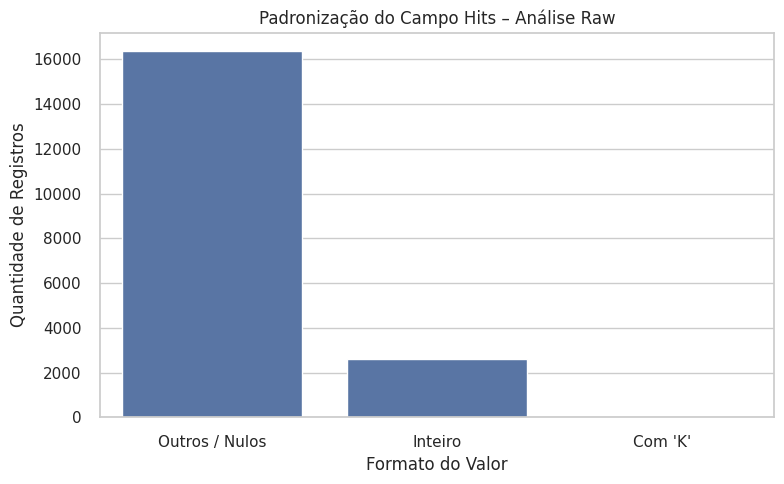

In [11]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=hits_count,
    x="Formato",
    y="Quantidade"
)

plt.title("Padronização do Campo Hits – Análise Raw")
plt.xlabel("Formato do Valor")
plt.ylabel("Quantidade de Registros")

plt.tight_layout()
plt.show()


## Conclusões

Com base nas análises realizadas, é possível compreender melhor a estrutura da tabela e ter uma noção clara de quais tipos de perguntas podem ser respondidas a partir desses dados. A análise dos metadados e da qualidade do arquivo evidencia que, embora o dataset apresente alta completude estrutural, algumas tratativas e padronizações são necessárias para que as análises sejam realizadas de forma correta e consistente nas camadas seguintes.

De modo geral, o arquivo CSV se mostra bastante completo e adequado aos objetivos do projeto, oferecendo uma base sólida para os processos de transformação, enriquecimento e análise que serão conduzidos nas camadas Silver e Gold.
